# Machine Learning Pipeline   
### *An Implementation of Financial Distress Prediction*  

*Yeol Ye   
University of Chicago  
ziyuye@uchicago.edu*

## Phase 1: Data Preparation

In [1]:
import os
import sys
import warnings
sys.path.append('../code/')
warnings.filterwarnings('ignore')

import prep
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
data_file = 'credit-data.csv'
df_file = 'df.pkl'
dict_file='Data Dictionary.xls'
cat_list = ['PersonID', 'zipcode']
target_name = 'SeriousDlqin2yrs'

prep.data_transforming(data_file, df_file, dict_file='Data Dictionary.xls')
df = prep.data_loading(df_file)

In [3]:
df.describe()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.000000,41016.000000,41016.00000,41016.000000,41016.000000,41016.000000,4.101600e+04,41016.000000,41016.000000,41016.000000,41016.000000,41016.000000
mean,115800.154598,0.161400,6.37587,51.683489,0.589233,331.458137,6.320623e+03,8.403477,0.419592,1.008801,0.371587,0.753681
std,28112.723511,0.367904,221.61895,14.746880,5.205628,1296.109695,1.208056e+04,5.207324,5.190382,1.153826,5.169641,1.113639
min,22.000000,0.000000,0.00000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106539.750000,0.000000,0.03431,41.000000,0.000000,0.176375,3.800000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,119901.500000,0.000000,0.18973,51.000000,0.000000,0.369736,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,134698.250000,0.000000,0.66716,62.000000,0.000000,0.866471,7.245500e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149999.000000,1.000000,22000.00000,109.000000,98.000000,106885.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


In [69]:
target, features = prep.target_features_split(target_name, df)
cat, numeric = prep.num_cat_split(features, cat_list)

## Phase 2: Data Exploration

In [109]:
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

In [25]:
def count_plot(column_name, data, title):
    plt.figure()
    ax = sns.countplot(x=column_name, data=data, palette="Set3")
    ax.set_title(title)

<IPython.core.display.Javascript object>


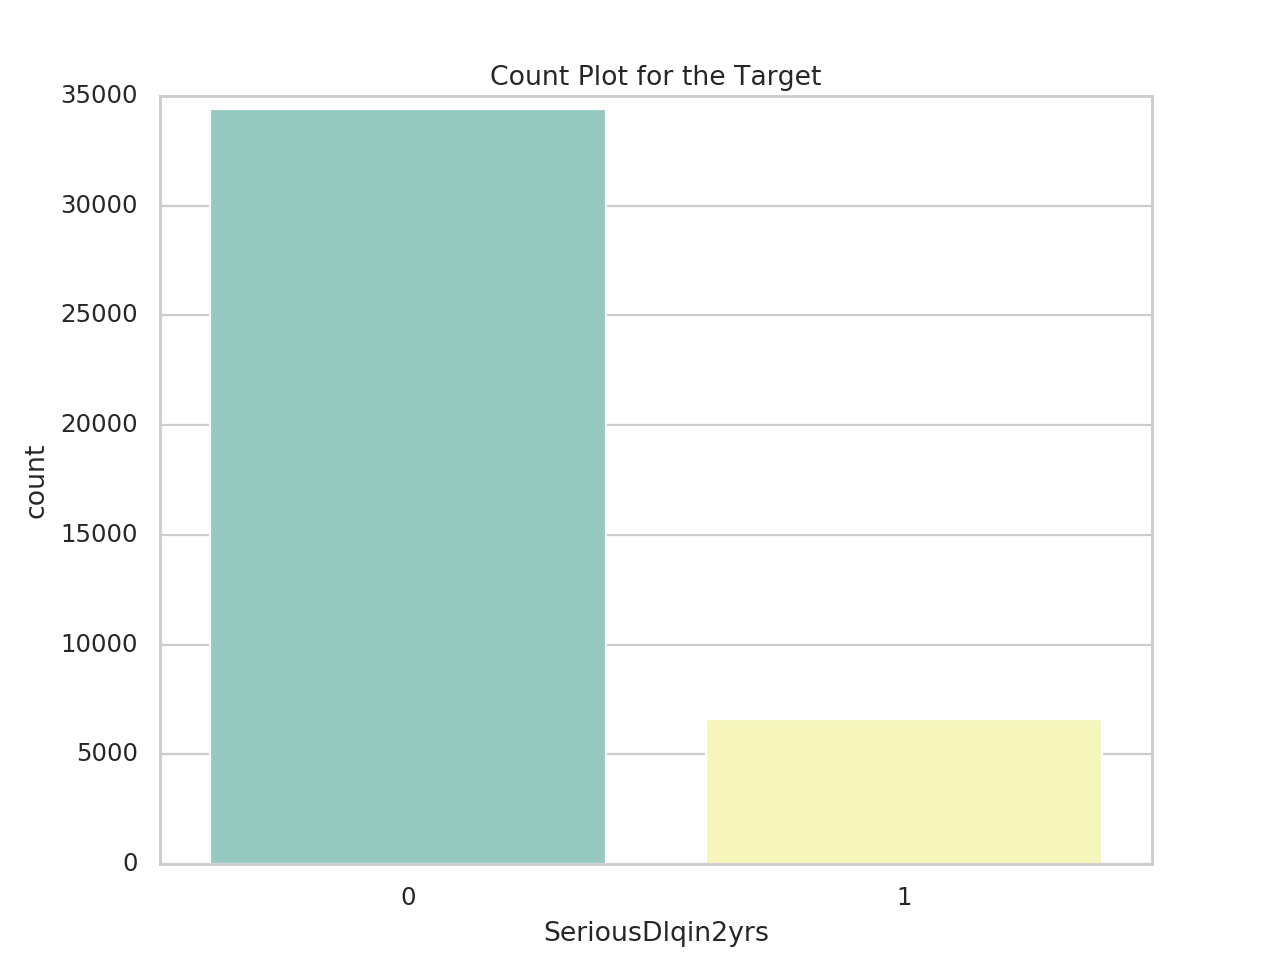

In [48]:
count_plot('SeriousDlqin2yrs', target, 'Count Plot for the Target')

<IPython.core.display.Javascript object>


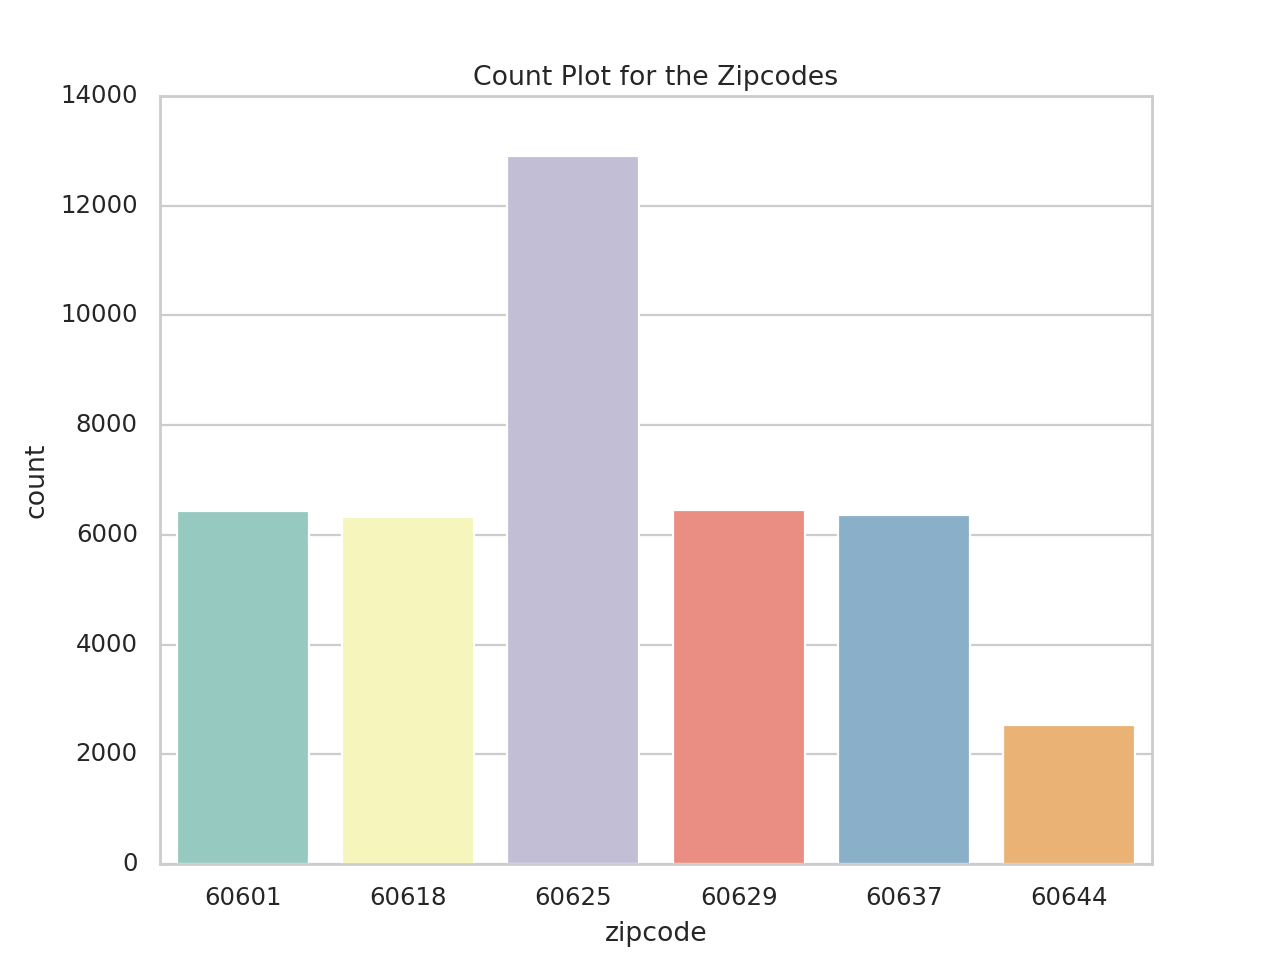

In [49]:
count_plot('zipcode', features, 'Count Plot for the Zipcodes')

In [119]:
def dist_plot(data, cut=True):
    n_cols = data.shape[1]
    fig_cols = 2
    fig_rows = n_cols // fig_cols
    
    fig, axes = plt.subplots(nrows=fig_rows, ncols=fig_cols, figsize=[20, fig_rows * 4])
    for i, col_name in enumerate(data.columns):
        subdata = data[col_name]
        if cut:
            _range = (subdata >= subdata.quantile(0.05)) & (subdata < subdata.quantile(0.95))
            subdata = subdata[_range]
        sns.distplot(subdata, ax=axes[i // fig_cols, i % fig_cols], color='g')

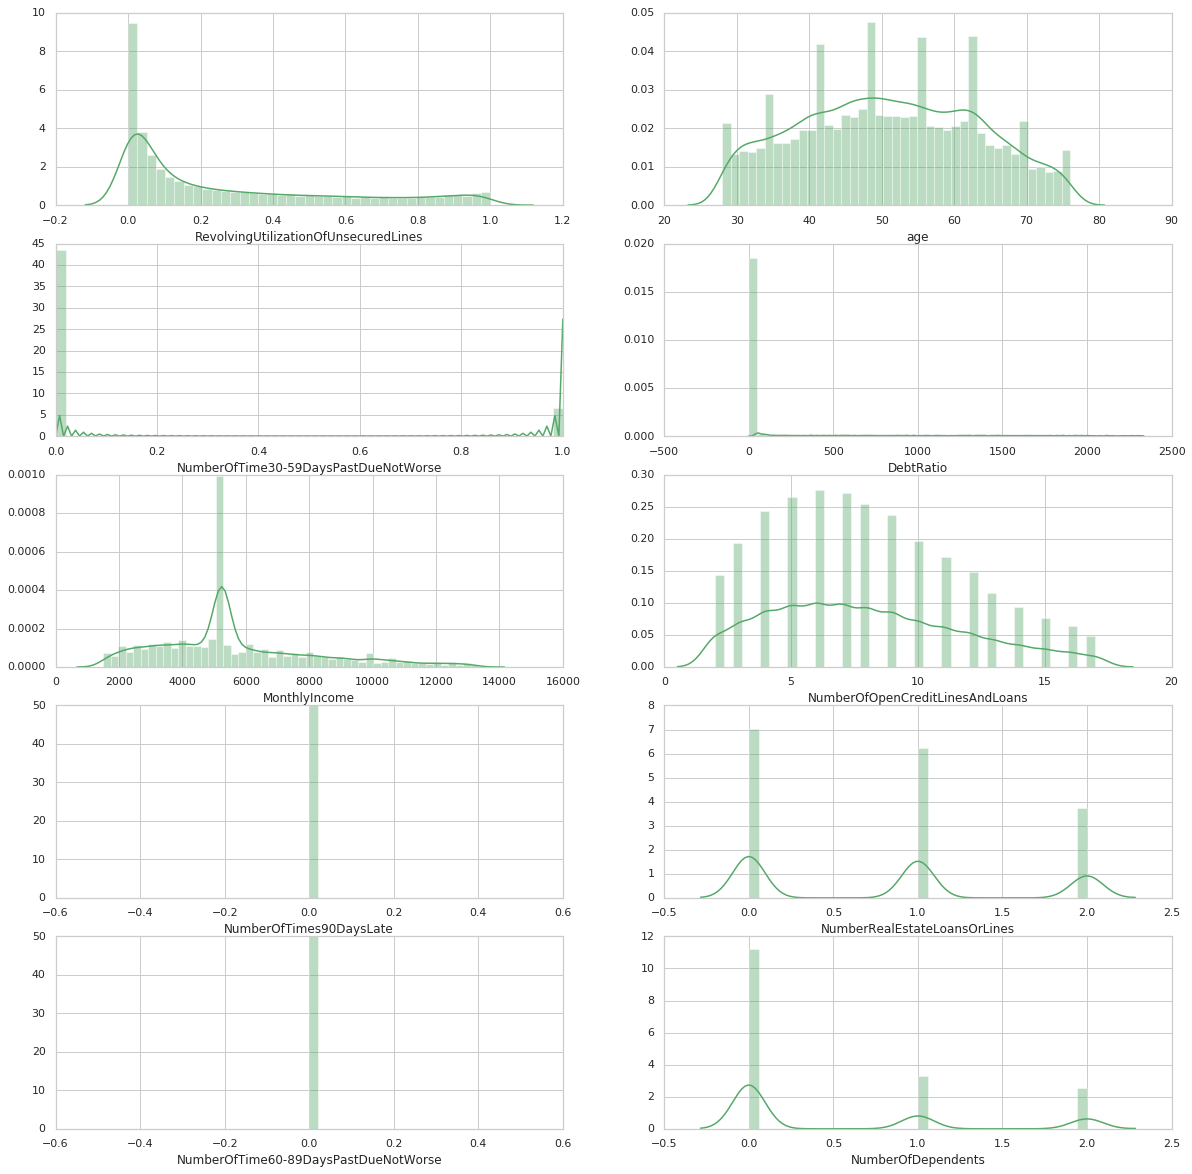

In [120]:
dist_plot(numeric)

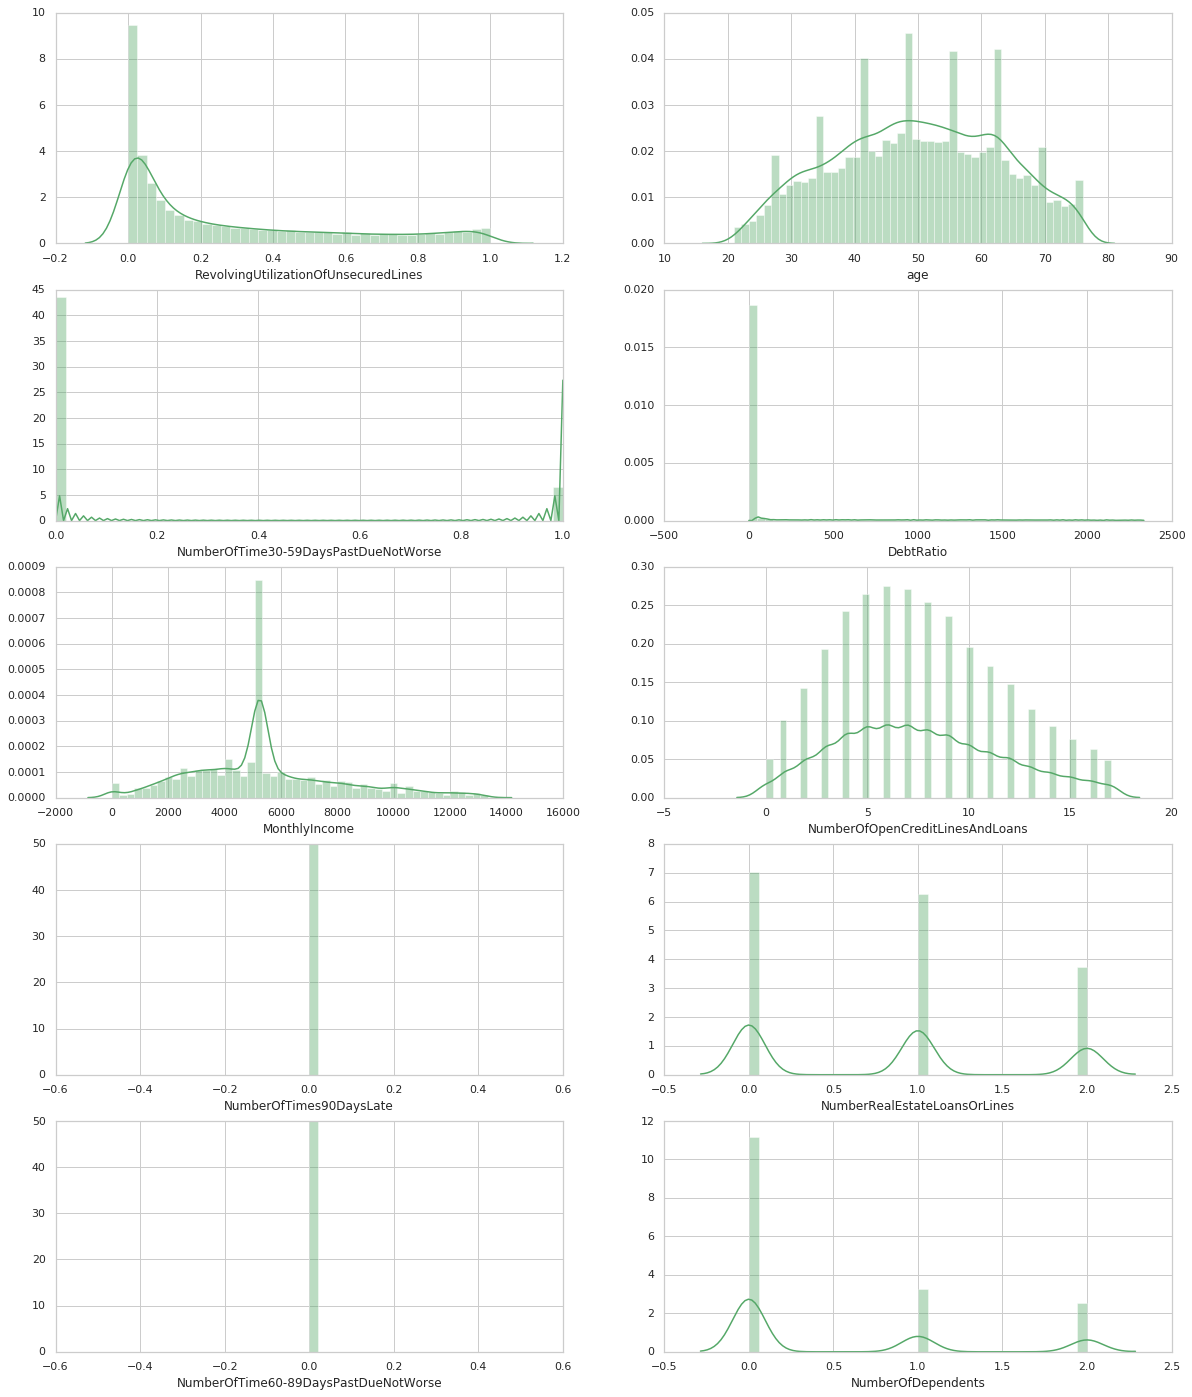

In [110]:
n_numeric = numeric.shape[1]
ncols = 2
nrows = n_numeric // 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=[20, rows * 4])
for i, column in enumerate(numeric.columns):
    data = numeric[column]
    filtered = data[(data >= data.min()) & (data < data.quantile(0.95))]
    ax = sns.distplot(filtered, ax=axes[i // ncols, i % ncols], color='g')